In [116]:
import pandas as pd

# Load IoT sensor data from CSV (Generated in Homework 1)
df = pd.read_csv("IoT Simulated Data.csv")

# Display the first few rows
print(df.head())

   SensorID Location   Timestamp  Temperature (°C)  Humidity (%)  \
0         1     Asia  2025-01-01             16.20         55.27   
1         1     Asia  2025-02-01             16.95         66.36   
2         1     Asia  2025-03-01             21.37         66.04   
3         1     Asia  2025-04-01             20.09         60.50   
4         1     Asia  2025-05-01             21.60         56.10   

   Air Quality Index (AQI)  Soil Moisture (%)  Particulate Matter 2.5 (µg/m³)  \
0                       60              40.31                           32.22   
1                       67              37.16                           29.54   
2                       77              39.44                           34.45   
3                       79              41.53                           34.94   
4                       78              38.30                           32.13   

   Particulate Matter 10 (µg/m³)  Ozone Concentration (ppm)  \
0                          35.57         

In [117]:
from web3 import Web3

ganache_url = "http://127.0.0.1:7545"  # Change port if necessary
web3 = Web3(Web3.HTTPProvider(ganache_url))

if web3.is_connected():
    print("✅ Connected to Ganache successfully!")
else:
    print("❌ Connection failed. Ensure Ganache is running.")

✅ Connected to Ganache successfully!


In [118]:
import json

contract_address = "0xB1b71055459388aD8c06386420DA1F58bb205C6D"

with open('abi.json') as f:
	abi = json.load(f)  # Replace with actual ABI JSON list

# Load the smart contract
contract = web3.eth.contract(address=contract_address, abi=abi)

# Set the default sender address (first account from Ganache)
web3.eth.default_account = web3.eth.accounts[0]


print(f"✅ Connected to Smart Contract at {contract_address}")

✅ Connected to Smart Contract at 0xB1b71055459388aD8c06386420DA1F58bb205C6D


In [119]:
total_records = contract.functions.getTotalRecords().call()
print(f"Total Records: {total_records}")

Total Records: 0


In [120]:
import time

def send_iot_data(device_id, data_type, data_value):
    txn = contract.functions.storeData(device_id, data_type, data_value).transact({
        'from': web3.eth.default_account,
        'gas': 3000000
    })
    receipt = web3.eth.wait_for_transaction_receipt(txn)
    print(f"✅ Data Stored: {data_type} - {data_value}, Txn Hash: {receipt.transactionHash.hex()}")

In [121]:
sensor_fields = [
    'Temperature (°C)',
    'Humidity (%)',
    'Air Quality Index (AQI)',
    'Soil Moisture (%)',
    'Particulate Matter 2.5 (µg/m³)',
    'Particulate Matter 10 (µg/m³)',
    'Ozone Concentration (ppm)',
    'Nitrogen Dioxide (ppm)',
    'Sulfur Dioxide (ppm)',
    'Carbon Monoxide (ppm)'
]

# Only send the first 50 rows for testing
for i, row in enumerate(df.iterrows()):
    if i >= 50:
        break
    row = row[1]
    sensor_id = str(row["SensorID"])
    for field in sensor_fields:
        try:
            data_value = str(row[field])
            send_iot_data(sensor_id, field, data_value)
            time.sleep(1)
        except Exception as e:
            print(f"❌ Error sending {field} for {sensor_id}: {e}")

✅ Data Stored: Temperature (°C) - 16.2, Txn Hash: fd45cbe9d0d4bc10b2932aacdf57aa3a60bbc3e762cf1b30abbe8519a825af99
✅ Data Stored: Humidity (%) - 55.27, Txn Hash: 9e51c27d0bd1ad0a6eb386c1b38886a38805ef48c13f751ea4dc92a7a2285e1d
✅ Data Stored: Air Quality Index (AQI) - 60, Txn Hash: 0f34d1a0bf434f13b97d3b41599b2d48cfe5c030c6f901db5904c2d1858ef999
✅ Data Stored: Soil Moisture (%) - 40.31, Txn Hash: 9a795d631dc446aeb25966fbc7b28bbef7125749bf59bf79a26c10c2b7aa6c6b
✅ Data Stored: Particulate Matter 2.5 (µg/m³) - 32.22, Txn Hash: 9c1839419f5390e87f6759b535f60de2de064211cb412df202980908b903f659
✅ Data Stored: Particulate Matter 10 (µg/m³) - 35.57, Txn Hash: 8de354c2f5b54cbaf867e2e196872976b4088bcca077a0f69a3721e5380b3414
✅ Data Stored: Ozone Concentration (ppm) - 0.0301, Txn Hash: 7d459bc6701527781512fd5b620f58f979836810648ad5bbdf19ac71a74b46cc
✅ Data Stored: Nitrogen Dioxide (ppm) - 0.0191, Txn Hash: bbc0d59a0d7d63abcdbf6174bd157cc1a6cdb0a499830ae08fb3f6e5c506f10a
✅ Data Stored: Sulfur Dioxid

In [122]:
total_records = contract.functions.getTotalRecords().call()
print(f"📦 Total IoT records stored: {total_records}")

📦 Total IoT records stored: 500


In [123]:
if total_records > 0:
    record = contract.functions.getRecord(0).call()
    print("📝 First Stored Record:", record)

📝 First Stored Record: [1751003270, '1', 'Temperature (°C)', '16.2']


In [130]:
import pandas as pd
import numpy as np

# Load the original wide-format dataset
df = pd.read_csv("IoT Simulated Data.csv")

# Melt the dataframe to long format (so we can extract numeric values)
df_long = df.melt(
    id_vars=["SensorID", "Location", "Timestamp"],
    var_name="data_type",
    value_name="data_value"
)

# Extract the numeric part from strings like "25.1 °C"
df_long["numeric_value"] = df_long["data_value"].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Optional: Fill missing values (if any)
df_long.fillna(0, inplace=True)

# Preview
print(df_long.head())

# Save cleaned file
df_long.to_csv("Cleaned IoT Simulated Data.csv", index=False)
print("✅ Cleaned IoT data saved successfully!")

   SensorID Location   Timestamp         data_type  data_value  numeric_value
0         1     Asia  2025-01-01  Temperature (°C)       16.20          16.20
1         1     Asia  2025-02-01  Temperature (°C)       16.95          16.95
2         1     Asia  2025-03-01  Temperature (°C)       21.37          21.37
3         1     Asia  2025-04-01  Temperature (°C)       20.09          20.09
4         1     Asia  2025-05-01  Temperature (°C)       21.60          21.60
✅ Cleaned IoT data saved successfully!


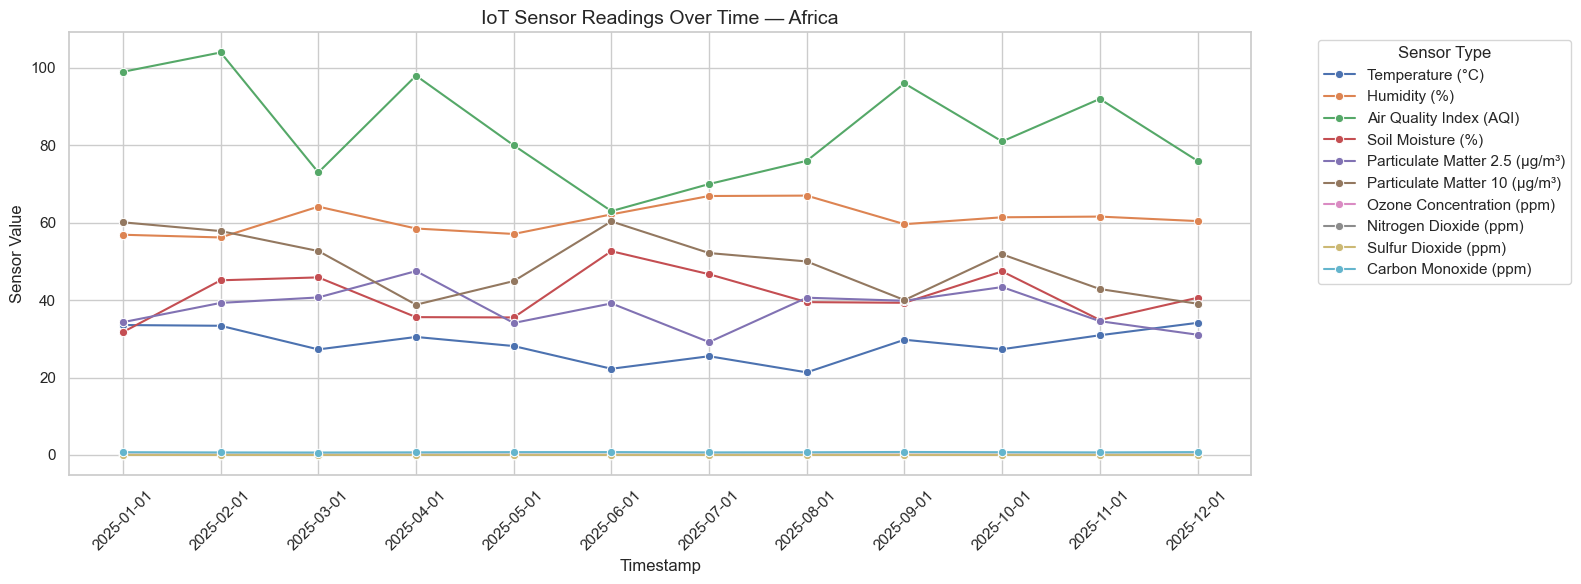

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("Cleaned IoT Simulated Data.csv")

# Normalize column names just in case
df.columns = df.columns.str.strip()

# Choose your location
selected_location = "Africa"

# Filter for that location
df_filtered = df[df["Location"] == selected_location]

# Filter only relevant sensor types
sensor_fields = [
    'Temperature (°C)',
    'Humidity (%)',
    'Air Quality Index (AQI)',
    'Soil Moisture (%)',
    'Particulate Matter 2.5 (µg/m³)',
    'Particulate Matter 10 (µg/m³)',
    'Ozone Concentration (ppm)',
    'Nitrogen Dioxide (ppm)',
    'Sulfur Dioxide (ppm)',
    'Carbon Monoxide (ppm)'
]

df_filtered = df_filtered[df_filtered["data_type"].isin(sensor_fields)]

# Step 4: Plot it
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

sns.lineplot(
    data=df_filtered,
    x="Timestamp",
    y="numeric_value",
    hue="data_type",
    marker="o"
)

# Rotate timestamps for readability
plt.xticks(rotation=45)

# Title and axis labels
plt.title(f"IoT Sensor Readings Over Time — {selected_location}", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Sensor Value", fontsize=12)

# Push legend outside the plot
plt.legend(title="Sensor Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Make layout tighter
plt.tight_layout()

# Show the plot
plt.show()
